<a href="https://www.kaggle.com/code/gamalfarag/predictive-maintenance-eda?scriptVersionId=105562446" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
   for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/microsoft-azure-predictive-maintenance/PdM_errors.csv
/kaggle/input/microsoft-azure-predictive-maintenance/PdM_telemetry.csv
/kaggle/input/microsoft-azure-predictive-maintenance/PdM_failures.csv
/kaggle/input/microsoft-azure-predictive-maintenance/PdM_machines.csv
/kaggle/input/microsoft-azure-predictive-maintenance/PdM_maint.csv


# Predictive Maintenance  datasaets for100 industrial machines(Exploratory Data Analysis)

Microsoft Azure Predictive Maintenance datasets

## Objectives

### Term Definitions:
1. Preventive Maintenance: is a scheduled maintenance procedures to avoid future non predictable failures
2. Reactive Maintenance  : Simply is fixing the failure of a system or machine after it already happened
3. Predictive Maintenance: The maintenance of a machine in a future time that is most propable of having a failure predicted by a machine learning model

### Data Description:
In this note book I will use five datasets(Microsoft Azure predictive maintenance)

*** PdM_errors.csv**:is an error log  of 3 features dataset :datatime as an hourly index,MachineId,error ;indicates the type of error encountered by the machine during 
operation.Note: an error does not cause the machine to stop so it is not considered as failure

***PdM_telemetry.csv:** It consists of hourly average of voltage, rotation, pressure, vibration collected from 100 machines for the year 2015

**PdM maint.csv:** This dataset contains a record for each time a machine component is changed. 

**PdM_failures.csv** dataset: this dataset contains an hourly record of the failed component in a machine of 100 machines

### Major steps

* Load data
* Clean Data
* Explore data
* visualize data
* Build model
* Measure model effiency


In [2]:
#Load the data
telemetry_df = pd.read_csv("../input/microsoft-azure-predictive-maintenance/PdM_telemetry.csv")
errors_df = pd.read_csv("../input/microsoft-azure-predictive-maintenance//PdM_errors.csv")
maint_df = pd.read_csv("../input/microsoft-azure-predictive-maintenance/PdM_maint.csv")
failures_df = pd.read_csv("../input/microsoft-azure-predictive-maintenance/PdM_failures.csv")
machines_df = pd.read_csv("../input/microsoft-azure-predictive-maintenance/PdM_machines.csv")


In [3]:
# Explore the Data
df_dict={'PdM_telemetry':telemetry_df,'PdM_errors':errors_df,'PdM_maint':maint_df,'PdM_failures':failures_df,'PdM_machines':machines_df}

for df_name,df in df_dict.items():
 print(df_name,'\n',df.head())
 print(df_name,'\n',df.shape)

PdM_telemetry 
               datetime  machineID        volt      rotate    pressure  \
0  2015-01-01 06:00:00          1  176.217853  418.504078  113.077935   
1  2015-01-01 07:00:00          1  162.879223  402.747490   95.460525   
2  2015-01-01 08:00:00          1  170.989902  527.349825   75.237905   
3  2015-01-01 09:00:00          1  162.462833  346.149335  109.248561   
4  2015-01-01 10:00:00          1  157.610021  435.376873  111.886648   

   vibration  
0  45.087686  
1  43.413973  
2  34.178847  
3  41.122144  
4  25.990511  
PdM_telemetry 
 (876100, 6)
PdM_errors 
               datetime  machineID errorID
0  2015-01-03 07:00:00          1  error1
1  2015-01-03 20:00:00          1  error3
2  2015-01-04 06:00:00          1  error5
3  2015-01-10 15:00:00          1  error4
4  2015-01-22 10:00:00          1  error4
PdM_errors 
 (3919, 3)
PdM_maint 
               datetime  machineID   comp
0  2014-06-01 06:00:00          1  comp2
1  2014-07-16 06:00:00          1  comp4
2  2

#### Find Null values

In [4]:
# find if there are null or nan values in all the data frames
for name,df in df_dict.items():
    print(name ,'\n  ',df.isnull().values.any())

PdM_telemetry 
   False
PdM_errors 
   False
PdM_maint 
   False
PdM_failures 
   False
PdM_machines 
   False


No null values found

#### Explore feature names and their datatypes

In [5]:
# find features data types
for name,df in df_dict.items():
    print(name ,'\n  ',df.dtypes)

PdM_telemetry 
   datetime      object
machineID      int64
volt         float64
rotate       float64
pressure     float64
vibration    float64
dtype: object
PdM_errors 
   datetime     object
machineID     int64
errorID      object
dtype: object
PdM_maint 
   datetime     object
machineID     int64
comp         object
dtype: object
PdM_failures 
   datetime     object
machineID     int64
failure      object
dtype: object
PdM_machines 
   machineID     int64
model        object
age           int64
dtype: object


### format datatime features

In [6]:
# format datatime features
df_list=[telemetry_df,errors_df,maint_df,failures_df]
for df in df_list:
    df['datetime']=pd.to_datetime(df['datetime'])



### Visualise histograms for the 5 dataframes



=======================================  ============================================
telemetry_df
=======================================  ============================================


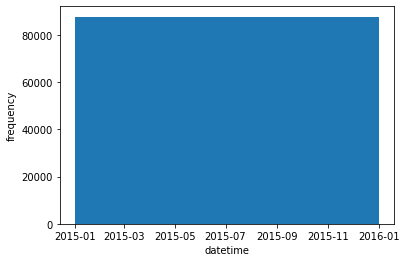

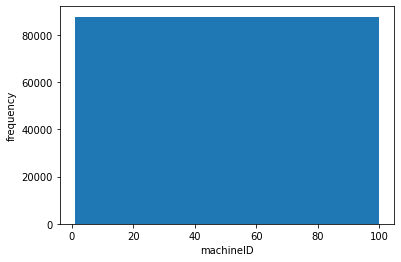

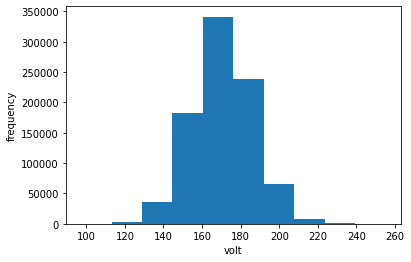

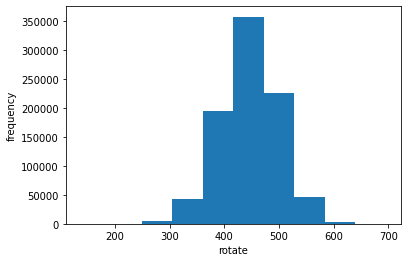

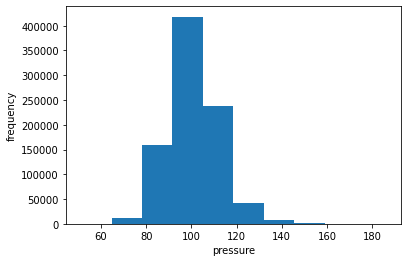

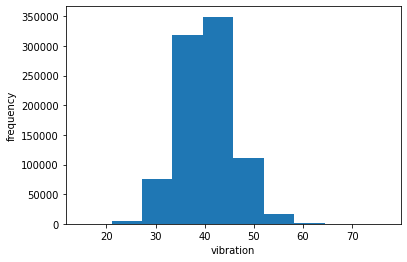

=======================================  ============================================

=======================================  ============================================
errors_df
=======================================  ============================================


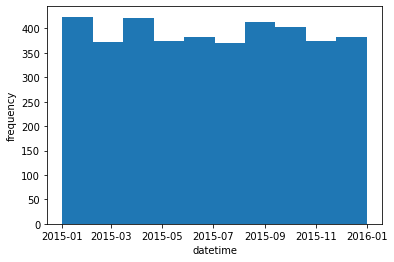

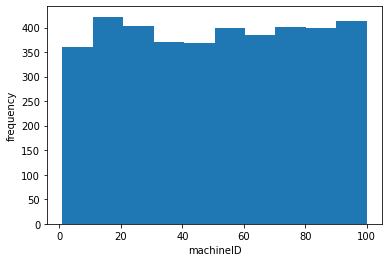

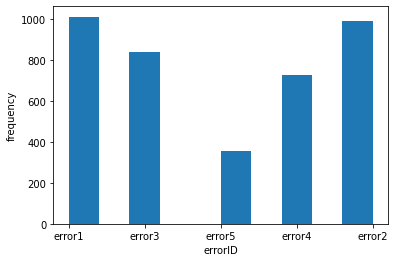

=======================================  ============================================

=======================================  ============================================
maint_df
=======================================  ============================================


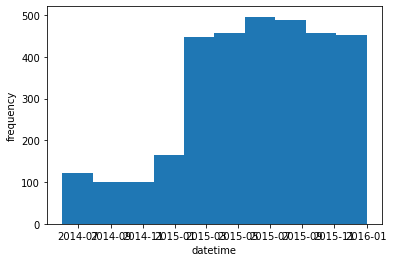

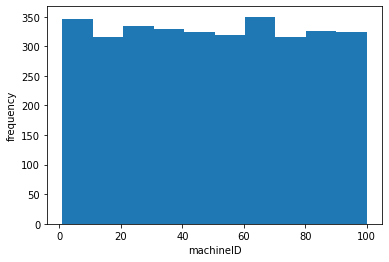

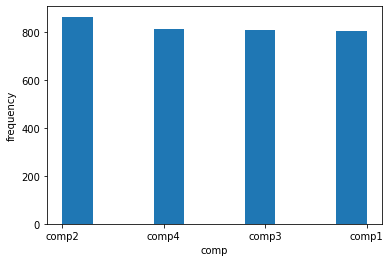

=======================================  ============================================

=======================================  ============================================
failures_df
=======================================  ============================================


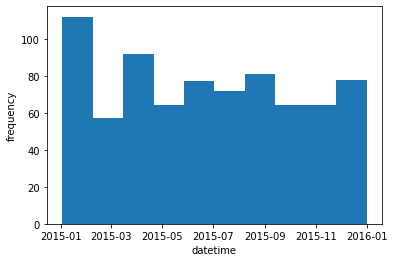

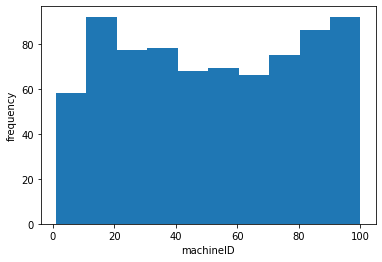

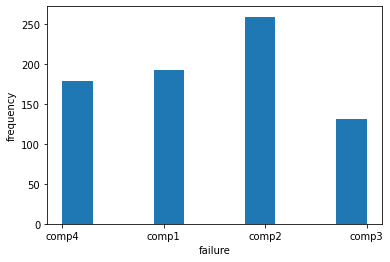

=======================================  ============================================


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
df_list=[telemetry_df,errors_df,maint_df,failures_df]
df_list_titles=['telemetry_df','errors_df','maint_df','failures_df']
for df,df_name in zip(df_list,df_list_titles):
    
  print("\n=======================================  ============================================")
  print(df_name)
  print("=======================================  ============================================")
  for j in range(0,len(df.columns)):
    # plt.figure(figsize=(20,5))
    # plt.subplot(2,len(df.columns),j+1, sharey= True)
    plt.hist(df.iloc[:,j])
    plt.xlabel(df.columns[j])
    plt.ylabel(ylabel='frequency',) 
    plt.show()

  print("=======================================  ============================================")  


### Get more insight of telemetry_df data

In [8]:
# Get more insight of telemetry_df data
print(telemetry_df.head())
print(telemetry_df.shape)

             datetime  machineID        volt      rotate    pressure  \
0 2015-01-01 06:00:00          1  176.217853  418.504078  113.077935   
1 2015-01-01 07:00:00          1  162.879223  402.747490   95.460525   
2 2015-01-01 08:00:00          1  170.989902  527.349825   75.237905   
3 2015-01-01 09:00:00          1  162.462833  346.149335  109.248561   
4 2015-01-01 10:00:00          1  157.610021  435.376873  111.886648   

   vibration  
0  45.087686  
1  43.413973  
2  34.178847  
3  41.122144  
4  25.990511  
(876100, 6)


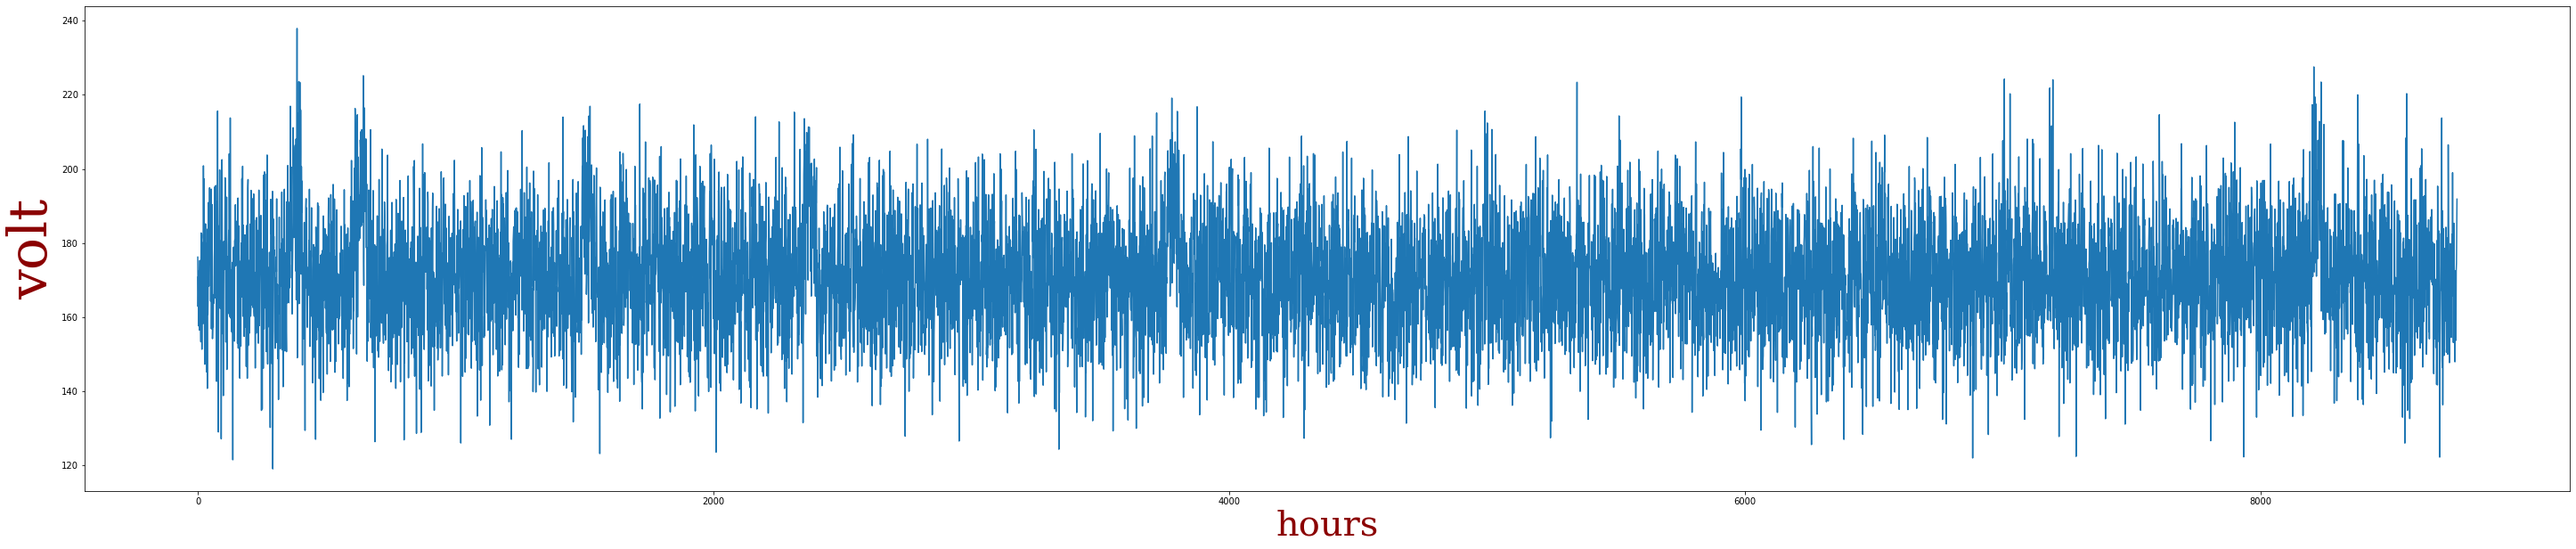

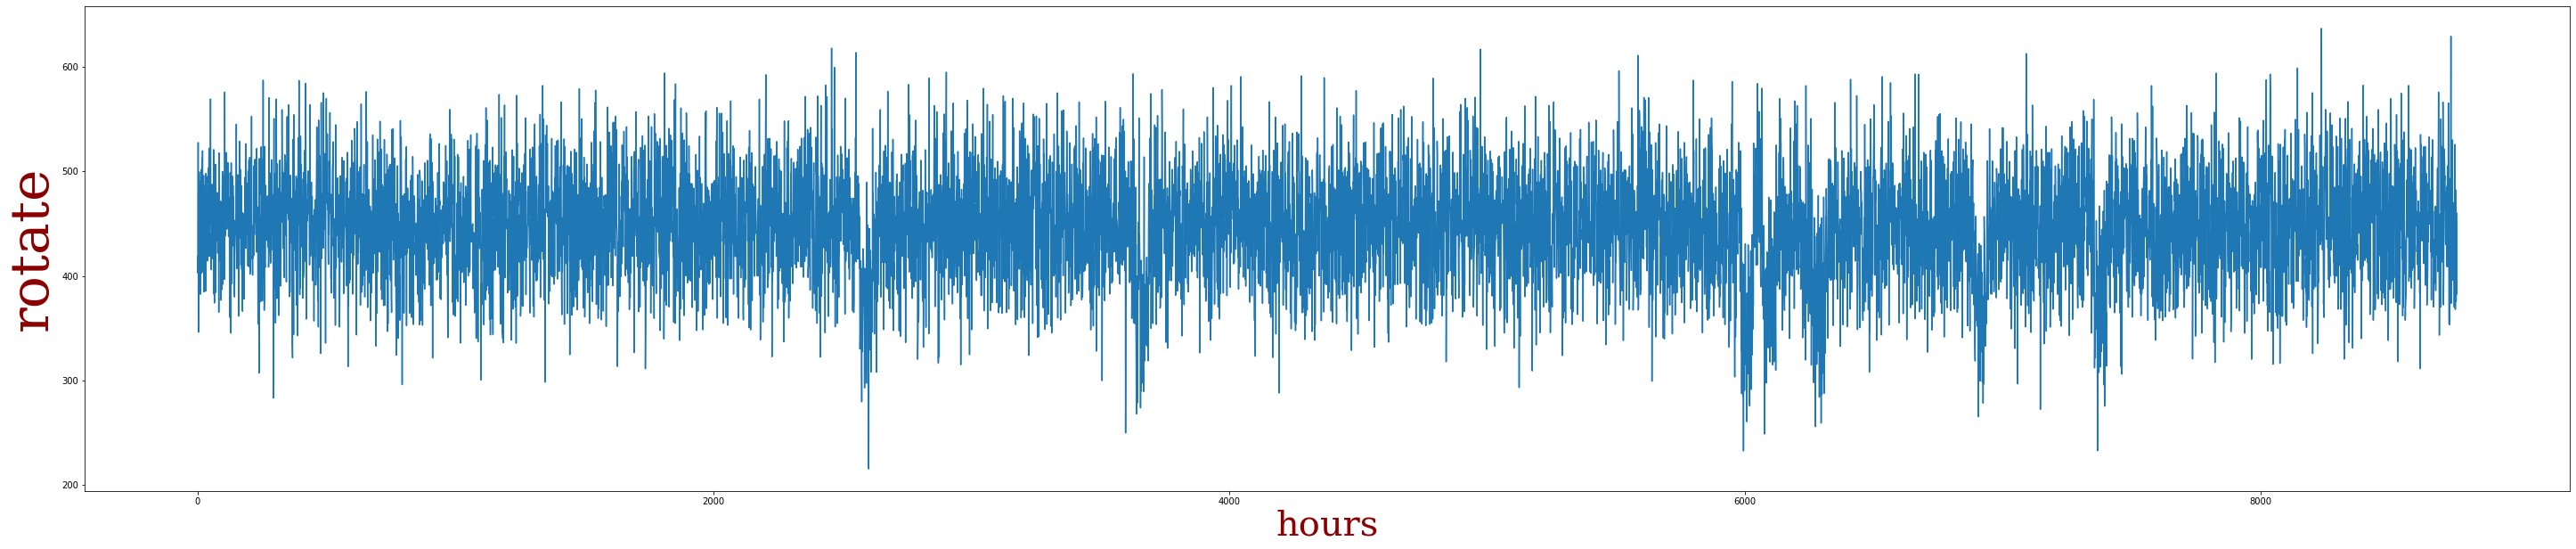

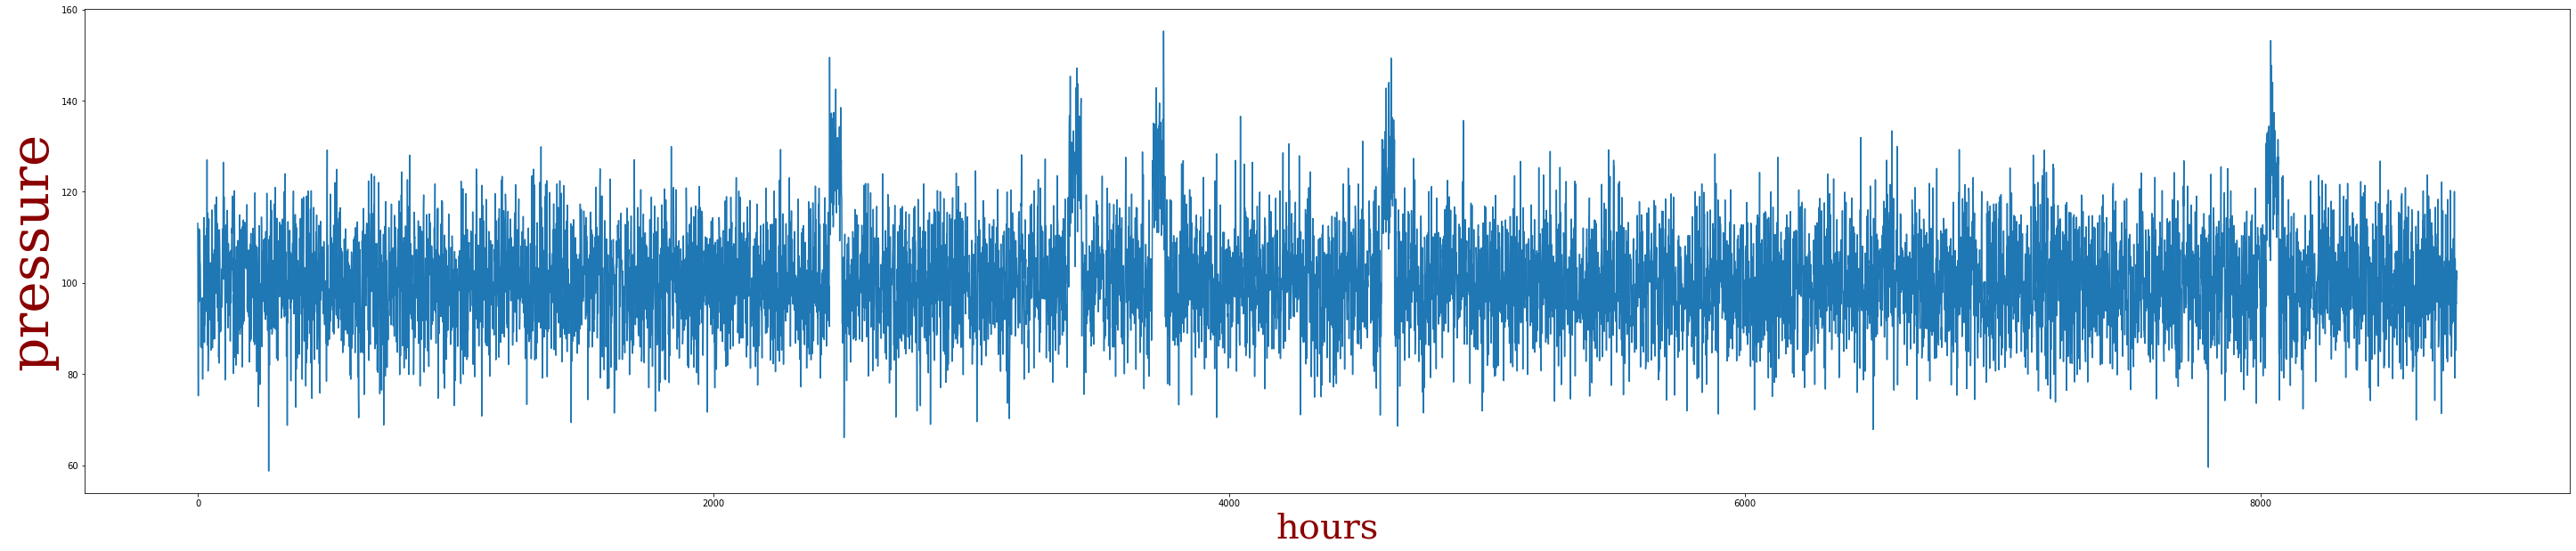

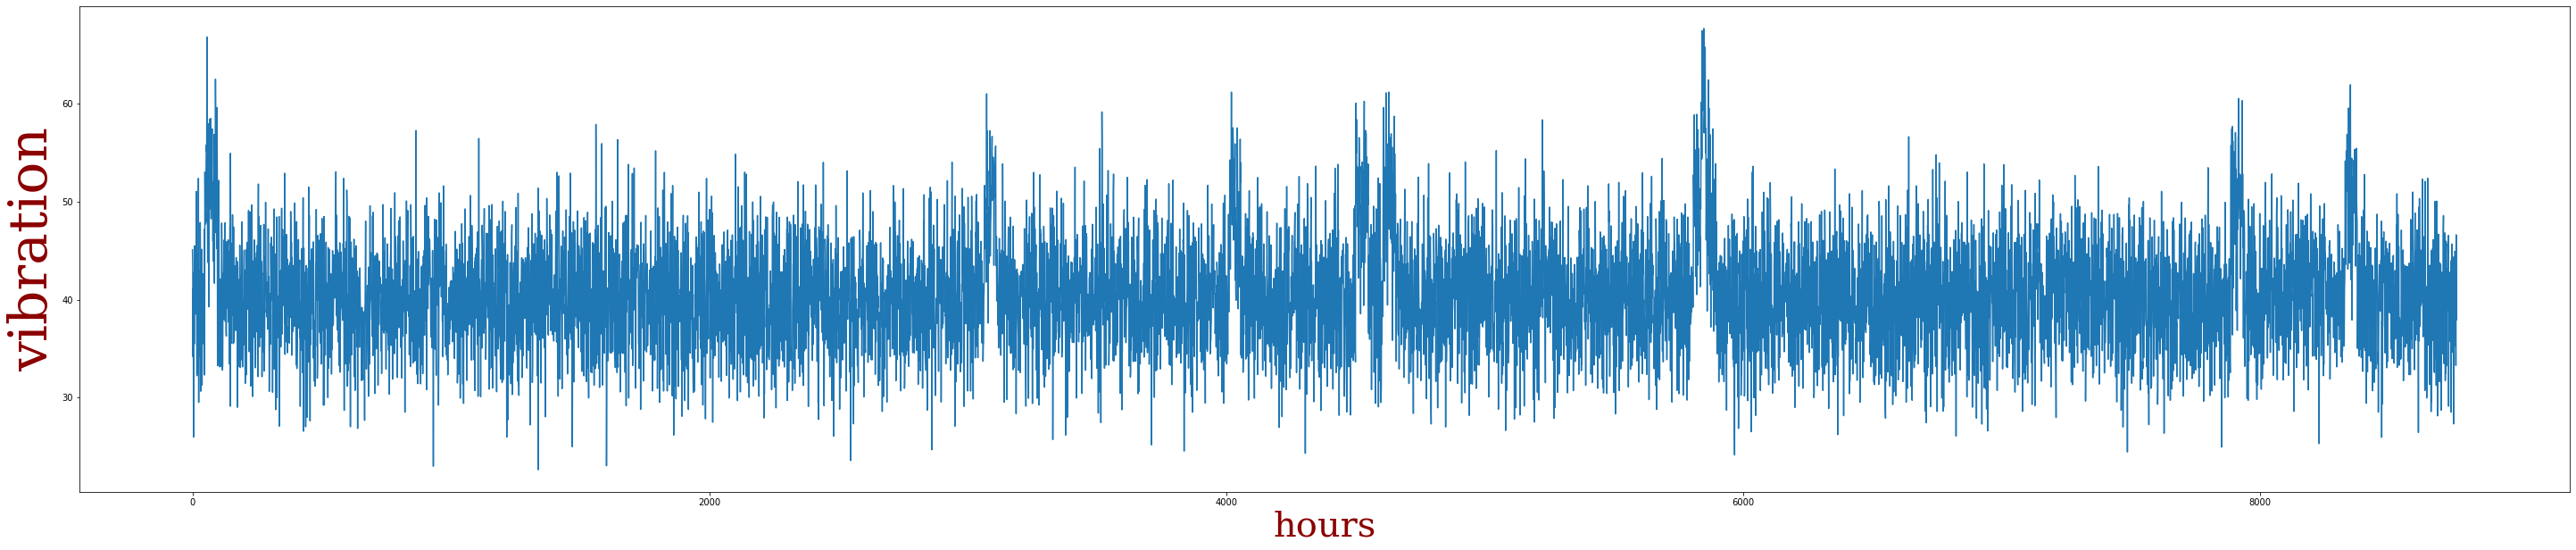

In [9]:
#Display telemetry parameters for machine number 7 for example
tele_machine_7=telemetry_df[telemetry_df['machineID']==7]
date_time= range(0,len(tele_machine_7))
for i in range(2,6):
 fig=plt.figure(figsize=(50,10))
 plt.plot(date_time,telemetry_df.iloc[:len(tele_machine_7),i])
 plt.ylabel(telemetry_df.columns[i],fontdict={'family': 'serif','color':  'darkred','weight': 'normal','size': 60})
 plt.xlabel('hours',fontdict={'family': 'serif','color':  'darkred','weight': 'normal','size': 40})
 

### More statistical data for machine 7 parameters

In [10]:
# Disply statistical parameters for the telemetry variables
tele_machine_7.describe()

,machineID,volt,rotate,pressure,vibration
count,8761.0,8761.000000,8761.000000,8761.000000,8761.000000
mean,7.0,171.180076,446.094595,100.826581,40.490124
std,0.0,15.799771,53.558573,10.807887,5.395538
min,7.0,113.805437,236.064617,61.860102,21.216104
25%,7.0,160.558749,410.863283,93.596886,36.847403
50%,7.0,170.971756,447.271470,100.573915,40.386797
75%,7.0,181.695814,482.185413,107.576379,43.834137
max,7.0,233.803886,635.182571,149.223445,64.530813


### Get correlation matrix for telemetry parameters

In [11]:
#Get the correlation matrix for machine 7
correlation=tele_machine_7.corr('pearson')
correlation

,machineID,volt,rotate,pressure,vibration
machineID,NaN,NaN,NaN,NaN,NaN
volt,NaN,1.000000,-0.009737,-0.018559,-0.006779
rotate,NaN,-0.009737,1.000000,-0.002665,-0.021263
pressure,NaN,-0.018559,-0.002665,1.000000,-0.003492
vibration,NaN,-0.006779,-0.021263,-0.003492,1.000000



#### As we observe from the correlation matrix the values are very small approaching zero which means there are no independence betwen variables


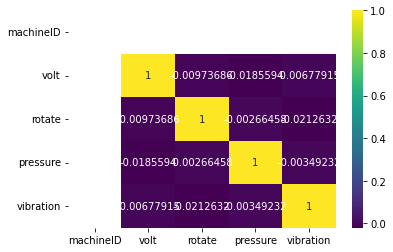

In [12]:
# heatmap for the correlation matrix
import seaborn as sns
sns.heatmap(correlation, annot=True, fmt="g", cmap='viridis')
plt.show()

### Observation :
-------------------
 
####  In PdM_telemetry.csv  dataset:
----------------------------------
All the variables(volt,rotation,vibration,pressure) follow nearly natural distribution but the correlation matrix shows no dependencies between the variable and as we note that this dataset as all the other 4 datasets are time series data sets  meaning that the each piece of observation is related to the previous observation other than other features

#### PdM_errors.csv  dataset :
 ----------------------------
From the histogram we can deduce that the most common errors are error1 and error2 and error5 is the least frequent.

#### PdM_maint.csv dataset :
----------------------------
From the histogram we find the four types of components being replaced during maintenance has the same count over the year

#### PdM_failures.csv dataset:
------------------------------
From the histogram we find the four types of components being replaced  after fail has different count over the year , with comp2 recorded the highest counts and comp3 the least count of failures
 
 

### Conclusion:
------------------
 As we have seen through the four preventive maintenance datasets are time series observations of 100 machines status.I  recommend  in order to get more value of these datasets by merging into one bigger dataset and prepare it for a suitable time series model